In [1]:
#LDA analysis on low-density protocol data (full dataset)
#Last updated 17 April 2021.
#Author: Shreya Deshmukh, Stanford University.

#Runs as a jupyter notebook through anaconda (on python version 2.7)

#Import the following libraries
import os
from os import listdir
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.covariance import OAS
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import scipy
from scipy import stats
from scipy.stats import ranksums
from sklearn.preprocessing import StandardScaler

plt.rc('font',family='Arial')

#Define file path
#path = 'C:\\Users\\yourefiledirectories' #input the file path to where statistical metrics of height distributions are stored

#os.listdir(path)

In [7]:
#Load PBS (low medium density protocol) data, statistical metrics of all samples' height distributions
df = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4a_lowdens.csv', sep=',', header=0, names =
               ['labels','Mean','Variance','Skewness','Kurtosis'])
    
X_pre = df.iloc[:,1:5].copy() #features
y = df.iloc[:,0].copy() #labels, where 0 refers to malaria-negative and 1 refers to malaria-positive

sc = StandardScaler()
#X = sc.fit_transform(X_pre)
X = X_pre.values
y = y.values

#Train Linear Discriminant Analysis (LDA) on training data
LDA = LinearDiscriminantAnalysis(n_components=1, store_covariance=True, solver = 'svd', tol = 10**(-4)) # projection in 1D space
data_proj = LDA.fit_transform(X,y)

scale = LDA.scalings_

print scale

[[-1.03049745e-02]
 [ 7.89113360e-04]
 [-5.94383415e-06]
 [ 6.55773305e-09]]


In [3]:
coeffsl = np.transpose(coefsPBS)

Xarr =  X
yarr = y 

#Loop through features and produce LDA scores
scores0 = np.zeros((Xarr.shape[0],2))
for i in range(Xarr.shape[0]):
    m = Xarr[i,0]
    v = Xarr[i,1]
    s = Xarr[i,2]
    k = Xarr[i,3]
    scores0[i,0] = scale[0]*m + scale[1]*v + scale[2]*s + scale[3]*k

scores0[:,1]=yarr

In [4]:
#Example with one sample

m = 280
v = 52100
s = 17500000
k = 10100000000

score = scale[0]*m + scale[1]*v + scale[2]*s + scale[3]*k

print score

[0.44341929]


In [8]:
#Save variables into a csv file
yourfilename = str('LDAscoresALL_lowdens')
np.savetxt('{}\{}.csv'.format(path,yourfilename), scores0, delimiter = ",") 

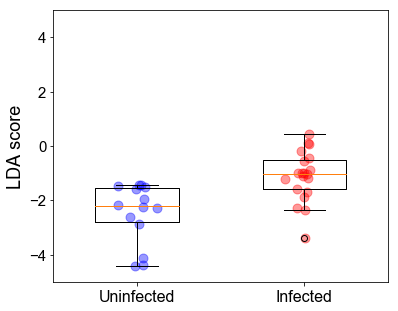

p-value, low dens: 0.0004576483948833603
Rank-sum test, low density: -3.394292929285261 0.0006880605208800327


In [9]:
#Plot & stats analysis of LDA scores
n = 0

#Load data
dataPBS = np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\{}.csv'.format(yourfilename), delimiter=',', encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:14,n])
data_iPBS = dataPBS[14:34,n]

smallmarker = dict(markersize=3)


#Plots
PBS = np.zeros((2,20))
PBS[0,0:14]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan


#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(6,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-5,5])
plt.ylabel('LDA score', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=80, color=c)
plt.show()


    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=True)
print 'p-value, low dens:', prob 

#Wilcoxon's rank-sum test
s,p = ranksums(data_uPBS, data_iPBS)
print "Rank-sum test, low density:", s,p


In [213]:
print scale

[[-1.03049745e-02]
 [ 7.89113360e-04]
 [-5.94383415e-06]
 [ 6.55773305e-09]]
